<div style="color:white;display:fill;border-radius:8px;font-size:200%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#fc6603'>AUTHOR: SOBIA ALAMGIR</span></b></p></div>

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Decision Tree Classifier</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>

- A **Decision Tree** is a supervised machine learning model used for classification and regression tasks. It works by splitting the data into subsets based on the values of the input features, forming a tree-like structure of decisions. 
  
- Each internal node represents a condition on a feature, each branch represents the outcome of that condition, and each leaf node represents a final decision or prediction. Decision Trees are intuitive, easy to interpret, and effective for both categorical and numerical data.

## Step-01 Load the libraries

In [7]:
# Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Step-02 Load `iris` Dataset

In [8]:
# Load dataset
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.value_counts().unique()

array([2, 1], dtype=int64)

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Let's take a overview of dataset using SCATTER PLOT**

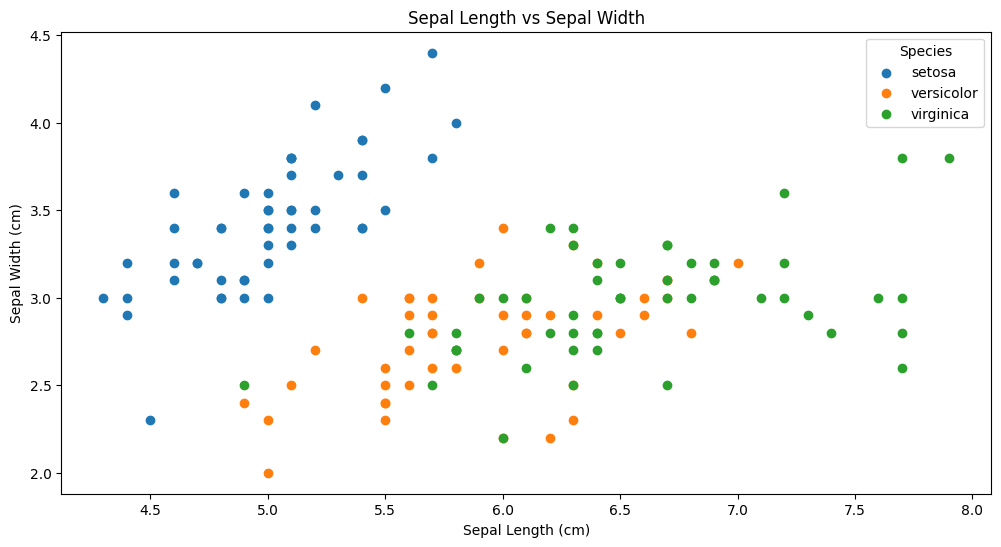

In [11]:
plt.figure(figsize = (12,6))
for species, species_data in df.groupby('species'):
    plt.scatter(species_data['sepal_length'] , species_data['sepal_width'] , label = species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend(title = 'Species')
plt.show()

In [12]:
# How many times loop will execute
len(df.groupby('species'))

3

## Step-03 Split the data in Dependent and Indepedent variables

In [13]:
# Split the data
X = df.drop('species' , axis = 1)   # Independent variable
y = df['species']       # Dependent variable

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

## Step-04 Model Training

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Step-05 Save and Load the model

In [16]:
# save the trained model to a file using joblib
# This allows you to reuse the model later workout needing to retrain it.
 
import joblib
joblib.dump(model , 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [17]:
# load the joblib file
loaded_model = joblib.load('decision_tree_model.pkl')

## Step-06 Prediction

In [18]:
y_predict = loaded_model.predict(X_test)

## Step-07 Evaluation Matrices

In [19]:
accuracy = metrics.accuracy_score(y_test,y_predict)
precision = metrics.precision_score(y_test , y_predict , average='weighted')
recall = metrics.recall_score(y_test , y_predict, average='weighted')
f1_score = metrics.f1_score(y_test , y_predict, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [20]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [24]:
from sklearn import tree

tree.export_graphviz(model,
                     out_file='iris_ML.dot',
                     feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
                     class_names=sorted(y.unique()),
                     label="all",
                     rounded=True,
                     filled=True
                     )

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Thanks For Reading My Notebook!​</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>